In [1]:
import pickle
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
with open('list_of_emotions.pickle', 'rb') as handle:
    list_of_emotions = pickle.load(handle)

In [3]:
anger_list = []
calm_list = []
happiness_list = []
for emotions in list_of_emotions:
    anger_list.append(emotions['anger'])
    calm_list.append(emotions['calm'])    
    happiness_list.append(emotions['happiness'])    

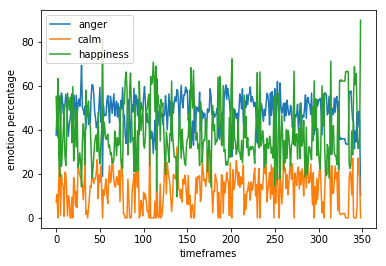

In [4]:
plt.plot(anger_list, label = "anger")
plt.plot(calm_list, label = "calm")
plt.plot(happiness_list, label = "happiness")
plt.xlabel("timeframes")
plt.ylabel("emotion percentage")
plt.legend()
plt.show()

In [6]:
anger_ave = np.round(np.average(anger_list),2)
calm_ave = np.round(np.average(calm_list),2)
happy_ave = np.round(np.average(happiness_list),2)

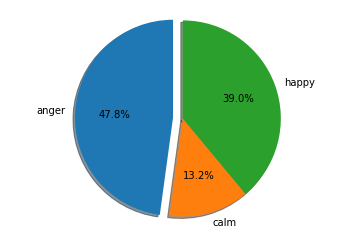

In [7]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels =  "anger", "calm", "happy"
sizes = [anger_ave, calm_ave, happy_ave]
explode = (0.1, 0, 0)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [8]:
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

In [9]:
dominant_emotion = []
for i in range(len(anger_list)):
    if anger_list[i] > calm_list[i] and anger_list[i] > happiness_list[i]:
        dominant_emotion.append("anger")
    if calm_list[i] > anger_list[i] and calm_list[i] > happiness_list[i]:
        dominant_emotion.append("calm")
    if happiness_list[i] > calm_list[i] and happiness_list[i] > anger_list[i]:
        dominant_emotion.append("happy")

In [10]:
len(dominant_emotion)

349

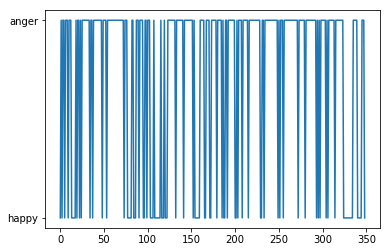

In [11]:
plt.plot(dominant_emotion)

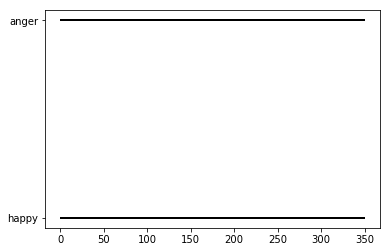

In [12]:
plt.hlines(dominant_emotion, xmin = 0, xmax=350)

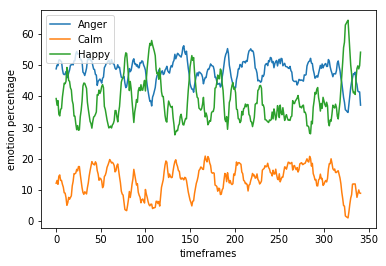

In [14]:
# plt.plot(anger_ave)

anger_moving_av = moving_average(anger_list, 8)
calm_moving_av = moving_average(calm_list, 8)
happy_moving_av = moving_average(happiness_list, 8)
plt.plot(anger_moving_av, label = 'Anger')
plt.plot(calm_moving_av, label = 'Calm')
plt.plot(happy_moving_av, label = 'Happy')
plt.legend(loc=2)
plt.xlabel("timeframes")
plt.ylabel("emotion percentage")
# plt.title()
plt.show()

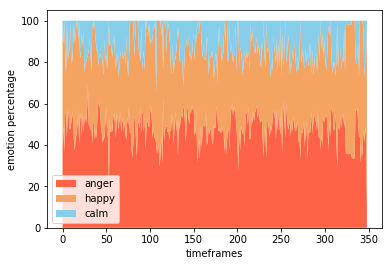

In [25]:
labels = ["anger", "happy", "calm"]
colors = ["tomato", "sandybrown", "skyblue"]
plt.stackplot(list(range(0,349)),[anger_list,happiness_list,calm_list], labels = labels, colors = colors)
plt.legend(loc=3)
plt.xlabel("timeframes")
plt.ylabel("emotion percentage")
plt.show()

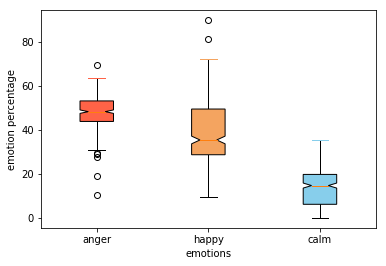

In [42]:
colors = ["tomato", "sandybrown", "skyblue"]
arr = np.array([anger_list,happiness_list,calm_list]).reshape(-1,3)
bp = plt.boxplot([anger_list,happiness_list,calm_list], patch_artist=True,notch=True)
for i in range(len(bp['boxes'])):
    bp['boxes'][i].set(facecolor=colors[i])
    bp['caps'][2*i+1].set(color=colors[i])  
plt.xticks([1,2,3], labels)
plt.xlabel("emotions")
plt.ylabel("emotion percentage")
plt.show()